## 主成分分析（PCA） principle Component Analysis

在PCA 中，数据从原来的坐标系转到了新的坐标系。
* 第一个新坐标轴选择的是原始数据中方差最大的方向
* 第二个新的坐标轴选择的是和第一个坐标轴正交且具有最大方法的方向，该过程一直重复（重复次数为特征数）

### 伪代码：
* 去除平均值
* 计算协方差矩阵
* 计算协方差矩阵的特征值和特征向量
* 将特征值从大到小排序
* 保留最上面的 N 个特征向量
* 将数据转换到上述 N 个特征向量构建的新空间中

In [4]:
from numpy import * 

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
#     print(stringArr)
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    print('meanVals:', meanVals)
    meanRemoved = dataMat - meanVals
    print('meanRemoved:', meanRemoved)
    covMat = cov(meanRemoved, rowvar=0)
    print('covMat:', covMat)
    eigVals, eigVects = linalg.eig(mat(covMat))
    print('eigVals:', eigVals)
    print('eigVects:', eigVects)
    eigValInd = argsort(eigVals)
    print('eigValInd:',eigValInd, type(eigValInd))
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    print('eigValInd:',eigValInd)
    redEigVects = eigVects[:, eigValInd]
    print('redEigVects:', redEigVects)
    lowDDataMat = meanRemoved * redEigVects
    print(lowDDataMat)
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    print(reconMat)
    return lowDDataMat, reconMat


dataMat = loadDataSet('testSet.txt')
# print(dataMat)

lowDMat, reconMat = pca(dataMat, 1)
# lowDMat

meanVals: [[9.06393644 9.09600218]]
meanRemoved: [[ 1.17124956  2.22599482]
 [ 1.05840256  2.71499082]
 [ 0.12629956 -0.19105918]
 ...
 [ 0.79098556  0.10539082]
 [ 0.05064356  0.03821282]
 [ 1.27096256 -0.55239818]]
covMat: [[1.05198368 1.1246314 ]
 [1.1246314  2.21166499]]
eigVals: [0.36651371 2.89713496]
eigVects: [[-0.85389096 -0.52045195]
 [ 0.52045195 -0.85389096]]
eigValInd: [0 1] <class 'numpy.ndarray'>
eigValInd: [1]
redEigVects: [[-0.52045195]
 [-0.85389096]]
[[-2.51033597e+00]
 [-2.86915379e+00]
 [ 9.74108510e-02]
 [-7.67782222e-01]
 [ 1.02715333e+00]
 [-1.44409178e+00]
 [-2.17360352e+00]
 [-7.73998803e-01]
 [-1.09983463e+00]
 [-1.70275987e+00]
 [-5.39605615e-01]
 [-9.15572638e-01]
 [-2.42669452e+00]
 [ 2.93613464e+00]
 [ 3.92702506e-01]
 [ 2.59205734e+00]
 [ 4.96435625e-01]
 [-1.52069930e+00]
 [ 1.25471104e-01]
 [ 1.41846162e+00]
 [ 5.89902904e-01]
 [ 6.69601540e-01]
 [ 3.25466068e-01]
 [ 1.18812333e+00]
 [ 2.07790920e+00]
 [ 3.24938650e-01]
 [ 3.41109884e+00]
 [ 1.92249899

In [5]:
[1,2,3][:-2:-1]

[3]

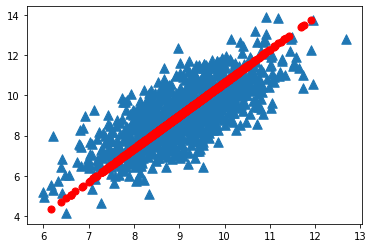

In [7]:
import matplotlib 
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=50, c='red')